## To replicate the sentiment analysis with data from twitter:
### A. Start a notebook instance in machine Learning Lab 
### B. Open the example link and download the source code from Github repository.
### C. Copy, paste and modify the python code file in the notebook

In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

In [ ]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


# Step 2: Authentication for Twitter API

In [4]:
# Authentication
consumerKey = "zfLgYTlBW3K2J33EU60X93BwE"
consumerSecret = "UdxnfoOxhmrmxpE2NsswHFvpNzzV5RpUkS76qmDNObVFQFbRTi"
accessToken = "1966702206-VoX28pRE9tVzVyVb7od085l8ahmJTXE5HPa9pvA"
accessTokenSecret = "Qf5OtqHXoUEiLatXmCSAEDUQSEZO0NX8HakLS4cCN25kY"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [5]:
# Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []



for tweet in tweets:
    
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search:  UCM
Please enter how many tweets to analyze:  200


In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  200
positive number:  37
negative number:  40
neutral number:  123


In [7]:
tweet_list

,0
0,"Esta tarde, a las 19:00, el Dr. Jorge García -..."
1,@frasespignavine @Jajajaland ya si soy fan del...
2,RT @ali_morales23_: La mejor trilogía del UCM ...
3,¡SEGUIRÁ COMO HARLEY QUINN! 🤡 \n\n#DanielRPK r...
4,Los guardianes de la galaxia efectivamente es ...
...,...
195,Esta serie va a remover los cimientos de lo qu...
196,@SalgadoNinja @MilitanVergonha Literalmente me...
197,@nk_ucm よくハードワークしたねいいことじゃん\n大正解！
198,RT @JL_MarceloP: Industria biofarmacéutica en ...


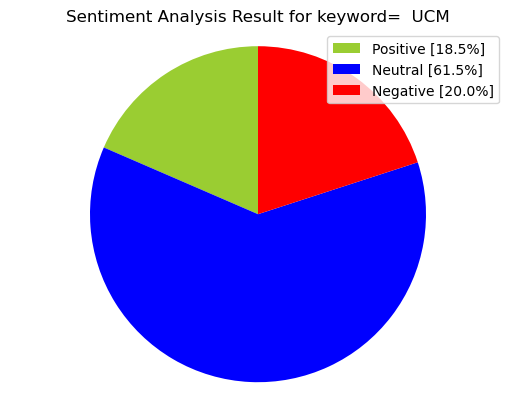

In [8]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [9]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [10]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,"Esta tarde, a las 19:00, el Dr. Jorge García -...","Esta tarde, a las 19:00, el Dr. Jorge García -..."
1,@frasespignavine @Jajajaland ya si soy fan del...,@frasespignavine @Jajajaland ya si soy fan del...
2,RT @ali_morales23_: La mejor trilogía del UCM ...,RT @ali_morales23_: La mejor trilogía del UCM ...
3,¡SEGUIRÁ COMO HARLEY QUINN! 🤡 \n\n#DanielRPK r...,¡SEGUIRÁ COMO HARLEY QUINN! 🤡 \n\n#DanielRPK r...
4,Los guardianes de la galaxia efectivamente es ...,Los guardianes de la galaxia efectivamente es ...
...,...,...
195,Esta serie va a remover los cimientos de lo qu...,Esta serie va a remover los cimientos de lo qu...
196,@SalgadoNinja @MilitanVergonha Literalmente me...,@SalgadoNinja @MilitanVergonha Literalmente me...
197,@nk_ucm よくハードワークしたねいいことじゃん\n大正解！,@nk_ucm よくハードワークしたねいいことじゃん\n大正解！
198,RT @JL_MarceloP: Industria biofarmacéutica en ...,RT @JL_MarceloP: Industria biofarmacéutica en ...


In [11]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"Esta tarde, a las 19:00, el Dr. Jorge García -...",esta tarde a las 19 00 el dr jorge garc a ...
1,@frasespignavine @Jajajaland ya si soy fan del...,ya si soy fan del ucm a ver el chistaco
2,RT @ali_morales23_: La mejor trilogía del UCM ...,la mejor trilog a del ucm james gunn no...
3,¡SEGUIRÁ COMO HARLEY QUINN! 🤡 \n\n#DanielRPK r...,seguir como harley quinn danielrpk rev...
4,Los guardianes de la galaxia efectivamente es ...,los guardianes de la galaxia efectivamente es ...
5,#GuardiansOfTheGalaxyVol3 es un grandioso y em...,guardiansofthegalaxyvol3 es un grandioso y em...
6,La mejor trilogía del UCM ya está acá. #Guardi...,la mejor trilog a del ucm ya est ac guardi...
7,"RT @comix_mx: Los mismos que decían, hace algu...",los mismos que dec an hace algunos meses qu...
10,"@RomanoWestwood Por eso Gunn va para DC, jaja....",por eso gunn va para dc jaja top del ucm ...
11,#GotGVol3 literalmente lloré casi toda la pel...,gotgvol3 literalmente llor casi toda la pel...


In [12]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_12630/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"Esta tarde, a las 19:00, el Dr. Jorge García -...",esta tarde a las 19 00 el dr jorge garc a ...,0.1,0.1,neutral,0.0,1.000,0.000,0.0000
1,@frasespignavine @Jajajaland ya si soy fan del...,ya si soy fan del ucm a ver el chistaco,0.0,0.0,positive,0.0,0.777,0.223,0.3182
2,RT @ali_morales23_: La mejor trilogía del UCM ...,la mejor trilog a del ucm james gunn no...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
3,¡SEGUIRÁ COMO HARLEY QUINN! 🤡 \n\n#DanielRPK r...,seguir como harley quinn danielrpk rev...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
4,Los guardianes de la galaxia efectivamente es ...,los guardianes de la galaxia efectivamente es ...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
5,#GuardiansOfTheGalaxyVol3 es un grandioso y em...,guardiansofthegalaxyvol3 es un grandioso y em...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
6,La mejor trilogía del UCM ya está acá. #Guardi...,la mejor trilog a del ucm ya est ac guardi...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
7,"RT @comix_mx: Los mismos que decían, hace algu...",los mismos que dec an hace algunos meses qu...,0.0,0.0,positive,0.0,0.882,0.118,0.4215
10,"@RomanoWestwood Por eso Gunn va para DC, jaja....",por eso gunn va para dc jaja top del ucm ...,0.5,0.5,positive,0.0,0.913,0.087,0.2023
11,#GotGVol3 literalmente lloré casi toda la pel...,gotgvol3 literalmente llor casi toda la pel...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000


In [13]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [16]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [17]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,45,52.33
negative,23,26.74
positive,18,20.93


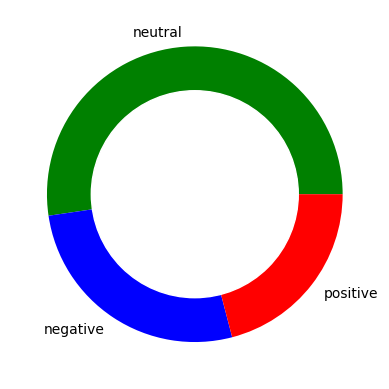

In [18]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [19]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



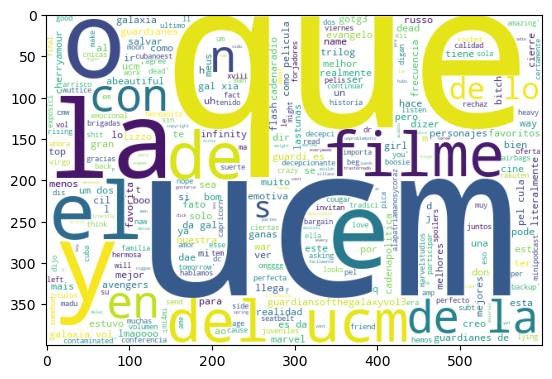

In [20]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

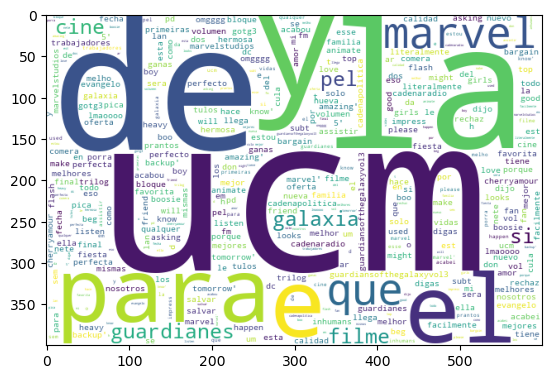

In [21]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

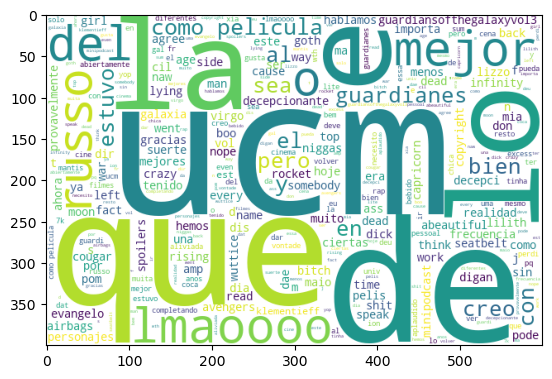

In [22]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

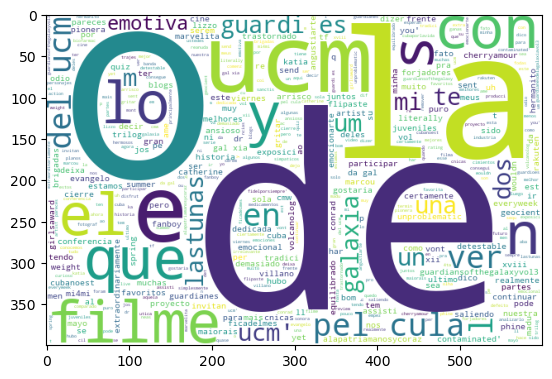

In [23]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)